# Barvy

Ve starověku byl Démokrites přesvědčen, že světlo je proud částic, které neustále vysílá každý viditelný předmět. Aristotelés však tvrdí, že se ono „průhledné“ šíří asi jako vlnky po vodní hladině. A tehdy začal vědecký spor, jenž se táhne až do dneška. [Janovic2005]

Spor o povaze světla se obnovil až v druhé polovině 17. století, kdy spolu  soupeřily dvě teorie. První, kterou obhajoval francouzský fyzik Pierre Gassendi (1592-1655), vysvětlovala světlo jako proud drobných částic šířících se nepředstavitelně velkou rychlostí. Druhou teorii předložil francouzský filozof René Descartes (1596-1650), který se domníval, že vesmír vyplňuje určitá látka (nazýval ji „plenum“), která vyvíjí tlak na oči a díky tomuto tlaku podle něj vzniká vidění.

V moderních dějinách navazuje

* Newtonova teorie barev
* Yungova korpuskulární teorie
* Maxwellova teorie elektromagnetického vlnění
* Einsteinova kvantová teorie světla

Dnes již víme, že světlo je elektromagnetické záření. Charakterizuje se frekvencí ν (eventuálně f), která udává počet vln neboli kmitů za sekundu (jednotkou je hertz), a vlnovou délkou $\lambda$.

### Diagram barevnosti ###

Všechny skutečné (reálné) barvy leží uvnitř tzv. plochy nesytých barev, která je v barevné rovině ohraničena křivkou sytých barev diagramu barevnosti.

![color](http://www.ped.muni.cz/wphy/publikace/jancovic1_soubory/image060.jpg)

[Pospisil1998] Pospíšil Jaroslav: Mísení barev a jejich grafické znázornění; Rozhledy matematicko-fyzikální; Praha: SPN, 1998, roč. 75, s. 160-166.

[Janovic2005] Adam Jančovič. Historie. Vnímání barev. Available at:

http://www.ped.muni.cz/wphy/publikace/Jancovic1.html

In [ ]:
http://www.ped.muni.cz/wphy/publikace/jancovicdiplomka2_soubory/image200.jpg

## Barevný model RGB a CMY

* Součtové míchání
* Rozdílové míchání

![souctovymodel](http://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/AdditiveColor.svg/220px-AdditiveColor.svg.png)
![rozdilovymodel](http://upload.wikimedia.org/wikipedia/commons/thumb/1/19/SubtractiveColor.svg/220px-SubtractiveColor.svg.png)

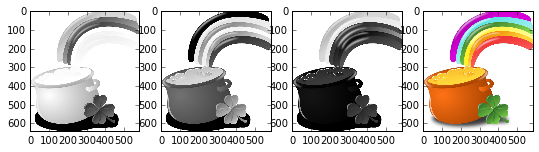

In [2]:
duha = skimage.io.imread('http://pixabay.com/static/uploads/photo/2013/07/12/17/20/luck-152048_640.png')
#lena = data.lena()

plt.figure(figsize=(9, 4))
plt.subplot(141)
plt.imshow(duha[:,:,0], cmap='gray')
plt.subplot(142)
plt.imshow(duha[:,:,1], cmap='gray')
plt.subplot(143)
plt.imshow(duha[:,:,2], cmap='gray')
plt.subplot(144)
plt.imshow(duha)

## Vztah mezi RGB a CMY

In [1]:
red_rgb = [1, 0, 0]
red_cmy = [0, 1, 1]

## Barevný model HSV a HSL

![hsv](http://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/HSV_color_solid_cylinder_alpha_lowgamma.png/320px-HSV_color_solid_cylinder_alpha_lowgamma.png "HSV")
![hsl](http://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/HSL_color_solid_cylinder_alpha_lowgamma.png/320px-HSL_color_solid_cylinder_alpha_lowgamma.png "HSL")

(640, 584, 4)


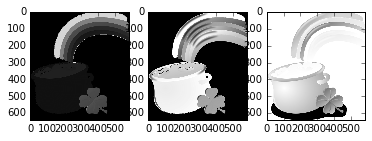

In [8]:
# import cv2
# duha_hsv = cv2.cvtColor(duha, cv2.COLOR_RGB2HSV)
import skimage.color
print duha.shape

duha_hsv = skimage.color.rgb2hsv(duha[:,:,:3])

plt.subplot(131)
imshow(duha_hsv[:,:,0], cmap='gray')
plt.subplot(132)
imshow(duha_hsv[:,:,1], cmap='gray')
plt.subplot(133)
imshow(duha_hsv[:,:,2], cmap='gray')


### Kdy je vhodné užívat jiný barevný model než RGB

Pro potřeby klasifikace může být výhodné využívat převod do jiného barevného modelu. 
Použití RGB je někdy nevhodné například z důvodu možného poklesu osvětlení. Následující ukázka naznačuje 
práci jednoduchého klasifikátoru podle nejmenší vzdálenosti s RGB barevným prostorem. Neznámý 
obraz je, pro člověka nepochopitelně, zařazen mezi šedé.

red [RGB]     [ 1.  0.  0.]
unknown [RGB] [ 0.4  0.   0. ]
gray [RGB]    [ 0.4  0.4  0.4]
dist to red   0.6
dist to gray  0.565685424949


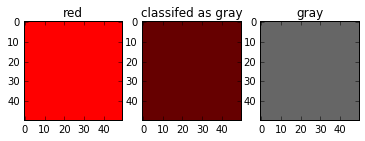

In [6]:

red = np.array([1.0,0.0,0.0])
gray = np.array([0.4, 0.4, 0.4])
unknown = np.array([0.4,0.0,0.0])

redsq =  red * np.ones([50,50,3])
graysq = gray * np.ones([50,50,3])
unknownsq = unknown * np.ones([50,50,3])


plt.subplot(131)
plt.title('red')
plt.imshow(redsq)

plt.subplot(132)
plt.title('classifed as gray')
plt.imshow(unknownsq)

plt.subplot(133)
plt.title('gray')
plt.imshow(graysq)

print "red [RGB]    ", red
print "unknown [RGB]", unknown
print "gray [RGB]   ", gray
print 'dist to red  ', np.linalg.norm(unknown - red)
print 'dist to gray ', np.linalg.norm(unknown - gray)


In [20]:
red_hsv = skimage.color.rgb2hsv(red.reshape(1,1,3))
gray_hsv = skimage.color.rgb2hsv(gray.reshape(1,1,3))
unknown_hsv = skimage.color.rgb2hsv(unknown.reshape(1,1,3))

print "red [HSV]    ", red_hsv.squeeze()
print "unknown [HSV]", unknown_hsv.squeeze()
print "gray [HSV]   ", gray_hsv.squeeze()
print 'dist to red  ', np.linalg.norm(unknown_hsv - red_hsv)
print 'dist to gray ', np.linalg.norm(unknown_hsv - gray_hsv)

red [HSV]     [ 0.  1.  1.]
gray [HSV]    [ 0.   0.   0.4]
unknown [HSV] [ 0.   1.   0.4]
dist to red   0.6
dist to gray  1.0
